In [1]:
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
import torch.utils.data as Data 
import torchvision 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import csv
import codecs
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
path = r'2.xlsx'
data1 = pd.read_excel(path,header=0)

In [4]:
X = data1.values[:, 3:23]
Y = data1.values[:, 1:3]


In [5]:
a = data1.values[:, 1:2]
Y2 = data1.values[:, 2:3]

In [6]:
Y1 = np.log10(a.astype('float'))
Y1 = -Y1+9
Y1= pd.DataFrame(Y1)
Y2  = pd.DataFrame(Y2)
Y = pd.concat([Y1, Y2], axis=1)
Y

,0,0
0,8.602060,8.60206
1,8.124939,8.12494
2,8.508638,8.50864
3,8.408935,8.40894
4,8.130768,8.13077
...,...,...
1969,6.131944,6.13194
1970,5.850781,5.85078
1971,7.721246,7.72125
1972,7.886057,7.88606


In [11]:
def minmaxscaler(df):
    min = np.amin(df)
    max = np.amax(df)    
    return (df - min)/(max-min)

In [7]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,2))
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(data=scaled_features, columns=['C1SP2','nHBAcc','ATSc2','MDEC-23','C3SP2','nHBAcc_Lipinski','ATSc1',
              'ETA_BetaP_s','BCUTc-1h','CrippenLogP','WTPT-5','nN','WTPT-3',
              'MLogP','minHssNH','maxHssNH','MLFER_BO','nHBAcc2','MLFER_BH','minssNH'])
scaler.fit(Y)
scaled_features = scaler.transform(Y)
#Y = pd.DataFrame(data=scaled_features, columns=['IC50_nM','pIC50'])

In [9]:
#X_train, X_test, Y_train, Y_test = train_test_split(minmaxscaler(X), minmaxscaler(Y), test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

In [10]:
x_tra = X_train.astype(float)
x_tra = torch.from_numpy(x_tra.values)
x_tra = x_tra.float()

x_tes = X_test.astype(float)
x_tes = torch.from_numpy(x_tes.values)
x_tes = x_tes.float()

y_tra = Y_train.astype(float)
y_tra = torch.from_numpy(y_tra.values)
y_tra = y_tra.float()

y_tes = Y_test.astype(float)
y_tes = torch.from_numpy(y_tes.values)
y_tes = y_tes.float()



In [11]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(20, 1000),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(1000, 800),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(800, 600),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(600, 500),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(300, 250),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(250, 2)
        )

        # init

    def forward(self, x):
        x = self.mlp(x)
        return x

In [12]:
lossData=[[]]
model = ANN()

In [ ]:
loss_func = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), 0.0001)
batch_size =64
epochs = 20000
print("epoch\t loss\t")
losses = []
for i in range(epochs):
     batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
     for start in range(0, len(x_tra), batch_size):
        end = start + batch_size if start + batch_size < len(x_tra) else len(x_tra)
        xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False)
        yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False)
        predict = model(xx)
        loss =loss_func(predict, yy)
        optim.zero_grad()
        loss.backward()
        optim.step()
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
     if i % 10==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

epoch	 loss	


<ipython-input-13-089197bce080>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False)
<ipython-input-13-089197bce080>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False)


0 39.92929
10 1.6111329
20 1.4902561
30 1.3618321
40 1.3059967
50 1.2741227
60 1.2562813
70 1.2664194
80 1.2104506
90 1.1825372
100 1.1931561
110 1.1106772
120 1.137238
130 1.2025756
140 1.080544
150 1.1538295
160 1.0573261
170 1.0812292
180 1.0610402
190 1.0034201
200 0.99211776
210 0.94898385
220 1.0294235
230 1.0209175
240 0.9706705
250 0.9710289
260 1.0167612
270 0.9685657
280 0.900725
290 0.8986783
300 0.9340927
310 0.918005
320 0.90759677
330 0.9063182
340 0.89707637
350 0.84126383
360 0.8666768
370 0.8640859
380 0.84412324
390 0.88568765
400 0.8277586
410 0.7936228
420 0.82039785
430 0.7871647
440 0.81626546
450 0.88561386
460 0.8613498
470 0.77304184
480 0.76225495
490 0.7904527
500 0.739778
510 0.7539826
520 0.66358274
530 0.7152558
540 0.7363937
550 0.7102681
560 0.66322243
570 0.6764015
580 0.6680249
590 0.64535826
600 0.65735507
610 0.645468
620 0.63670385
630 0.5987172
640 0.62018114
650 0.5869746
660 0.5863824
670 0.6042888
680 0.5454314
690 0.5826006
700 0.5513519
710 0.

5290 0.12982064
5300 0.12563653
5310 0.12705392
5320 0.1150983
5330 0.12066598
5340 0.12009755
5350 0.13124184
5360 0.11573826
5370 0.13321905
5380 0.12132842
5390 0.1272156
5400 0.1258286
5410 0.122794606
5420 0.12489667
5430 0.117232636
5440 0.12197137
5450 0.116420224
5460 0.12344582
5470 0.1260054
5480 0.12117303
5490 0.1196734
5500 0.12160901
5510 0.13306007
5520 0.11159171
5530 0.12824896
5540 0.13008665
5550 0.12565373
5560 0.12235314
5570 0.11564453
5580 0.119414456
5590 0.14771663
5600 0.11795988
5610 0.12199286
5620 0.12520437
5630 0.113591194
5640 0.11666272
5650 0.112080514
5660 0.10465965
5670 0.11643627
5680 0.119985774
5690 0.11303277
5700 0.1204976
5710 0.117059596
5720 0.12114102
5730 0.11993261
5740 0.12279893
5750 0.112174965
5760 0.11969114
5770 0.11254051
5780 0.11293463
5790 0.12226263
5800 0.108469084
5810 0.10945655
5820 0.11712441
5830 0.11864236
5840 0.12891299
5850 0.11665342
5860 0.117970526
5870 0.10943127
5880 0.11462435
5890 0.10397138
5900 0.1104928
5910

10340 0.08160905
10350 0.079540536
10360 0.087208636
10370 0.10082847
10380 0.07560901
10390 0.07800759
10400 0.074748285
10410 0.09101629
10420 0.07232234
10430 0.09328117
10440 0.07745976
10450 0.10003229
10460 0.09205162
10470 0.07789223
10480 0.11622983
10490 0.10586337
10500 0.07920869
10510 0.09732055
10520 0.08010889
10530 0.09122307
10540 0.07883231
10550 0.075404
10560 0.076652445
10570 0.07834153
10580 0.08468337
10590 0.07785051
10600 0.076144755
10610 0.07796357
10620 0.07188359
10630 0.09050893
10640 0.07997523
10650 0.07903871
10660 0.075396344
10670 0.07855234
10680 0.10535478
10690 0.071551986
10700 0.09155033
10710 0.11056328
10720 0.076083034
10730 0.07899824
10740 0.07757136
10750 0.08416789
10760 0.08052428
10770 0.07580923
10780 0.08277683
10790 0.08324584
10800 0.08943793
10810 0.070834525
10820 0.086855754
10830 0.09801409
10840 0.07331308
10850 0.08033092
10860 0.09127473
10870 0.08519812
10880 0.09018369
10890 0.074674025
10900 0.075629875
10910 0.06971581
1092

In [553]:
test=pd.DataFrame(data=losses)
test.to_csv('./loss_ANN2.csv',encoding='gbk')

Text(0, 0.5, 'loss')

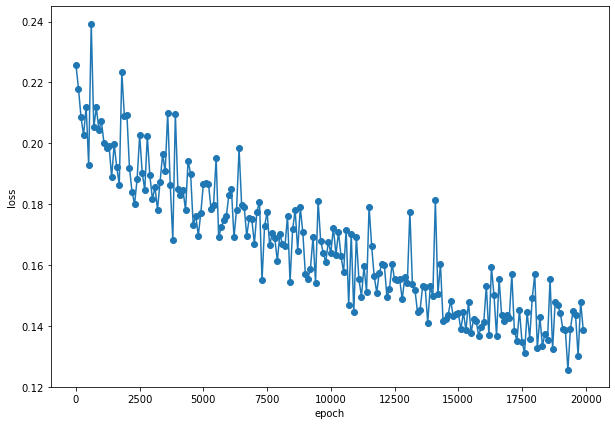

In [554]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [557]:
predicted = model(x_tes)

predicted = predicted.detach().numpy()

 
# 计算误差
result =abs(np.mean(predicted- Y_test))
print("The mean error of linear regression:")
print(result)

The mean error of linear regression:
0    0.017745
0    0.017593
dtype: float64


In [558]:
torch.save(model,"ANN.pth")

In [158]:
#predicted1[:,1]

In [559]:
x_tra

tensor([[1.5896, 1.5897, 1.8009,  ..., 1.0500, 1.0303, 1.3999],
        [1.6331, 1.5128, 1.0000,  ..., 1.0500, 1.0606, 1.0939],
        [1.3951, 1.1795, 1.0000,  ..., 1.0000, 1.0455, 1.0939],
        ...,
        [1.3957, 1.4359, 1.6675,  ..., 1.0000, 1.0152, 1.0939],
        [1.4354, 1.3846, 1.6537,  ..., 1.0000, 1.0000, 1.0939],
        [1.3947, 1.3590, 1.0000,  ..., 1.1000, 1.0758, 1.0939]])

In [560]:
#import random
#slice = random.sample(x_tes.numpy().tolist(), 150)


In [561]:
#slice = torch.Tensor(slice)

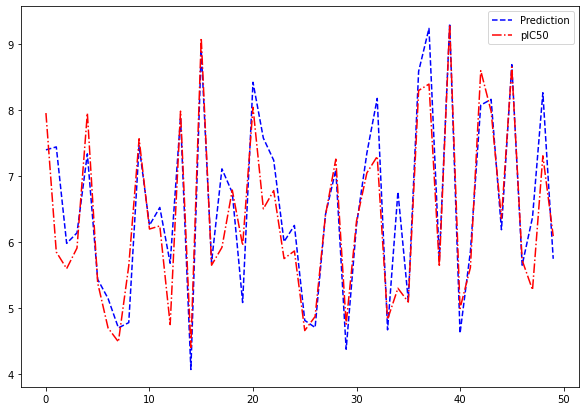

In [564]:
predicted1 = model(x_tes[0:50,:])

predicted1 = predicted1.detach().numpy()

fig, ax = plt.subplots(figsize = (10, 7))
#plt.scatter(x_ver[: ,2],predicted1)
#plt.scatter(x_ver[: ,2],y_ver)

ax.plot(predicted1[:,1],color="blue", label='Prediction', linestyle = '--')
ax.plot(y_tes[0:50,1], color="red",label='pIC50', linestyle = '-.')
#ax.plot(y_ver, label='Y2', linestyle = '-')
ax.legend()
#ax.set_xlabel('f')
#ax.set_ylabel('s11')
#print(predicted1)

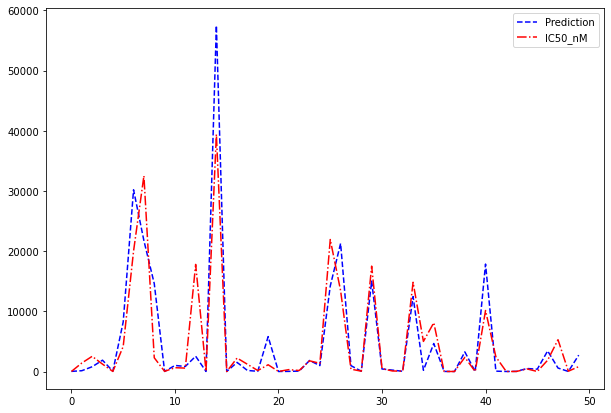

In [742]:
predicted2 = model(x_tes[0:50,:])
predicted2 = predicted2.detach().numpy()
#y_tes1= np.exp(-y_tes[0:50,0]+9)
r=-y_tes[0:50,0]+9
r = np.array(r)
y_tes1=np.power(10,r)
u = -predicted2[:,0]+9
u = np.array(u)
predicted3 = np.power(10,u)
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(predicted3,color="blue", label='Prediction', linestyle = '--')
ax.plot(y_tes1, color="red",label='IC50_nM', linestyle = '-.')
#ax.plot(y_ver, label='Y2', linestyle = '-')
ax.legend()

In [656]:
df = pd.read_csv(r"2_test_20 feature.csv")

In [657]:
T = df.values[:, 1:21]
T.shape

(50, 20)

In [658]:
T = minmaxscaler(T)
T = T.astype(float)
T = torch.from_numpy(T)
T = T.float()

In [659]:
predicted4 = model(T)


In [660]:
predicted4 = predicted4.detach().numpy()

In [661]:
c=predicted4[:,1]
c

array([5.2313232, 5.199647 , 4.9398637, 5.259994 , 4.849398 , 5.631479 ,
       4.407215 , 4.8729653, 5.432119 , 5.223732 , 4.855544 , 4.9792366,
       4.542212 , 5.1840844, 4.655321 , 5.0742183, 5.1096406, 5.204479 ,
       4.8320675, 5.550359 , 5.173207 , 4.998423 , 5.076184 , 5.4685154,
       5.170187 , 4.7133565, 5.217375 , 5.126226 , 4.931354 , 5.0986958,
       4.906422 , 5.437214 , 4.9636984, 5.119158 , 5.0605965, 5.522114 ,
       5.1257796, 5.0204062, 6.1387587, 7.0713744, 5.4329376, 5.4489465,
       5.6810026, 7.25457  , 6.0720453, 4.8635054, 4.8533926, 5.4242287,
       4.6909475, 5.1832933], dtype=float32)

In [663]:
np.savetxt("PIC50.csv",c)

In [664]:
predicted4[:,0]

array([5.232395 , 5.1999855, 4.940475 , 5.2604876, 4.850724 , 5.6316757,
       4.4078016, 4.875457 , 5.4322944, 5.224413 , 4.8570523, 4.980174 ,
       4.5435934, 5.185091 , 4.6567283, 5.075247 , 5.1107283, 5.204751 ,
       4.8333206, 5.5500975, 5.1724186, 4.9991226, 5.0779486, 5.4693046,
       5.1677365, 4.7141814, 5.218071 , 5.126325 , 4.9326124, 5.101366 ,
       4.906515 , 5.438102 , 4.965152 , 5.1199446, 5.059503 , 5.522935 ,
       5.126449 , 5.0213203, 6.139516 , 7.0718517, 5.433367 , 5.449881 ,
       5.6818924, 7.2546854, 6.072921 , 4.864358 , 4.8550043, 5.4250803,
       4.6919394, 5.183914 ], dtype=float32)

In [665]:
i = -predicted4[:,0]+9
i = np.array(i)
predicted5 = np.power(10,i)

In [666]:
d = predicted5 
d

array([ 5856.051  ,  6309.784  , 11468.985  ,  5489.2427 , 14101.84   ,
        2335.2012 , 39101.945  , 13321.195  ,  3695.776  ,  5964.679  ,
       13897.852  , 10467.09   , 28602.672  ,  6529.937  , 22043.053  ,
        8409.171  ,  7749.4653 ,  6240.9253 , 14678.423  ,  2817.7505 ,
        6723.283  , 10020.223  ,  8357.02   ,  3393.8718 ,  6796.158  ,
       19311.613  ,  6052.4194 ,  7476.096  , 11678.514  ,  7918.3364 ,
       12401.805  ,  3646.6848 , 10835.481  ,  7586.744  ,  8719.607  ,
        2999.612  ,  7473.962  ,  9520.937  ,   725.24396,    84.75167,
        3686.6611 ,  3549.1057 ,  2080.2122 ,    55.63071,   845.433  ,
       13666.02   , 13963.545  ,  3757.6792 , 20326.408  ,  6547.6553 ],
      dtype=float32)

In [667]:
np.savetxt("IC50.csv",d)